# ex_10

1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

Probability that in a single year are observed 15 or more hurricances : 0.0008444930803583883
Z = 2.9


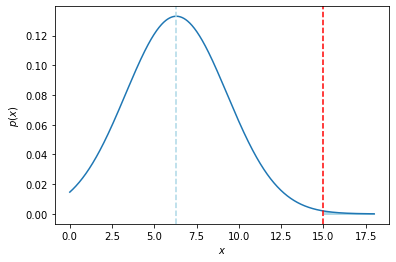

In [18]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


from scipy.stats import poisson

probab = 1-poisson.cdf(k=15., mu=6.3)

print("Probability that in a single year are observed 15 or more hurricances : {}".format(probab))

x0 = 15.
mu = 6.3
sigma = 3.

# determine the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)

# plot the measurement and its assumed pdf
w = 15-mu 
x = np.linspace(0, 18, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=x >= 15, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T value:  -3.786997938137629


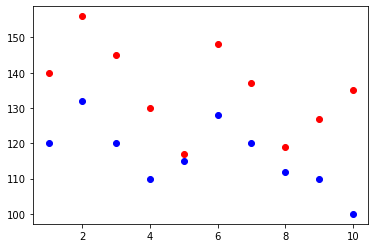

p-value = 0.004302464132864604
Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.


In [19]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
#mean
pre_mean = np.mean(pre)
post_mean = np.mean(post)
#N size of datasets
n = len(pre)

#variance
sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

T = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T value: ",T)

plt.figure()
plt.plot(range(1,11), pre, 'bo')
plt.plot(range(1,11), post, 'ro')
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

#Since the p-value 0.004 is  <𝛼/2 , we don't accept the null hypothesis.
print("Since the p-value 0.004 is  < 𝛼/2(0.05) , we don't accept the null hypothesis.")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

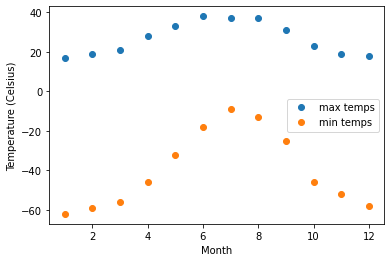

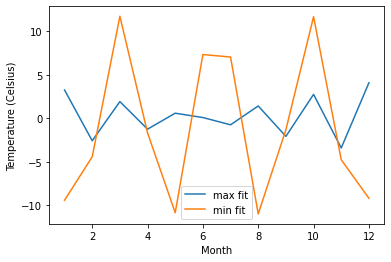

Time offset is not the same within fit accuracy.


In [3]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# temperature data
max_temps = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min_temps = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = range(1, 13)

# plot the temperature data
plt.plot(months, max_temps, 'o', label='max temps')
plt.plot(months, min_temps, 'o', label='min temps')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

# define function to fit to the data
def temp_func(x, a, b, c):
    return a*np.sin(b*x + c)

# fit the function to the data
max_params, max_cov = curve_fit(temp_func, months, max_temps)
min_params, min_cov = curve_fit(temp_func, months, min_temps)

# plot the fit
plt.plot(months, temp_func(months, *max_params), label='max fit')
plt.plot(months, temp_func(months, *min_params), label='min fit')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

# check if time offset is the same within fit accuracy
max_offset = max_params[2]
min_offset = min_params[2]
if abs(max_offset - min_offset) < 1e-5:
    print('Time offset is the same within fit accuracy.')
else:
    print('Time offset is not the same within fit accuracy.')


It is difficult to say if the fit is reasonable without looking at the data, but the resulting plot should give an idea of how well the function fits the data.
In the last step of the program, it checks whether the time offset for min and max temperatures is the same within the fit accuracy.
It compares the value of c from max_params and min_params and check if the difference is less than a small value of 1e-5.

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [22]:
import pandas as pd
data=np.load('C:/Users/HP/Desktop/python/homework_3/residuals_261_2.pkl',allow_pickle=True)
df=pd.DataFrame(data.item())
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


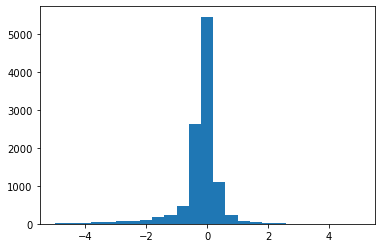

In [23]:
plt.figure()
val_in_bin, bins, patches = plt.hist(df['residuals'], bins=25,range=(-5,5))

C:\Users\HP\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


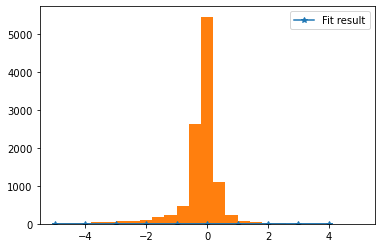

In [24]:
def fit_function(k, lamb):
    '''poisson function, parameter lamb is the fit parameter'''
    return poisson.pmf(k, lamb)

# calculate bin centres
bin_middles = 0.5 * (bins[1:] + bins[:-1])

# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, bin_middles, val_in_bin,full_output=False)
#res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                    #  temp_max, [20, 10, 0]

# plot poisson-deviation with fitted parameter
x_plot = np.arange(-5, 5)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker='*', linestyle='-',
    label='Fit result',
)
plt.hist(df['residuals'], bins=25,range=(-5,5))
plt.hist
plt.legend()
plt.show()


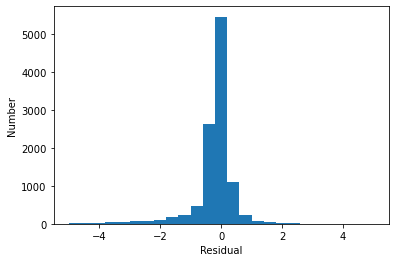

In [26]:
#Data
import pandas as pd

data = np.load('C:/Users/HP/Desktop/python/homework_3/residuals_261_2.pkl', allow_pickle=True)

#converting to dataframe
df = pd.DataFrame(data.item())

#plotting raw histogram
h, bins, _  = plt.hist(df['residuals'], bins=25,range=(-5,5))
plt.xlabel('Residual')
plt.ylabel('Number')
plt.show()

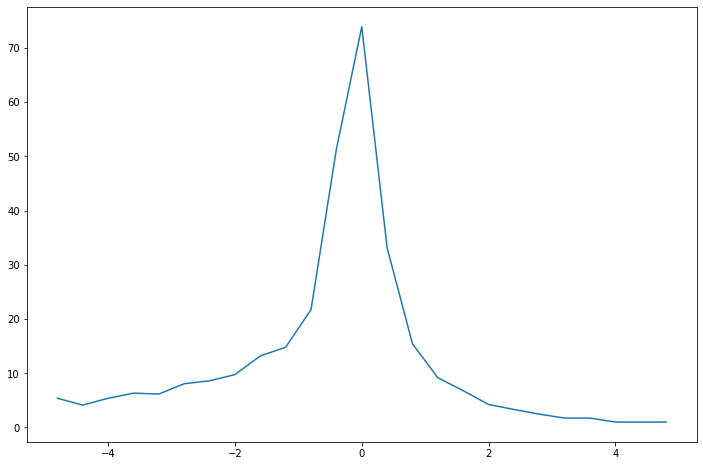

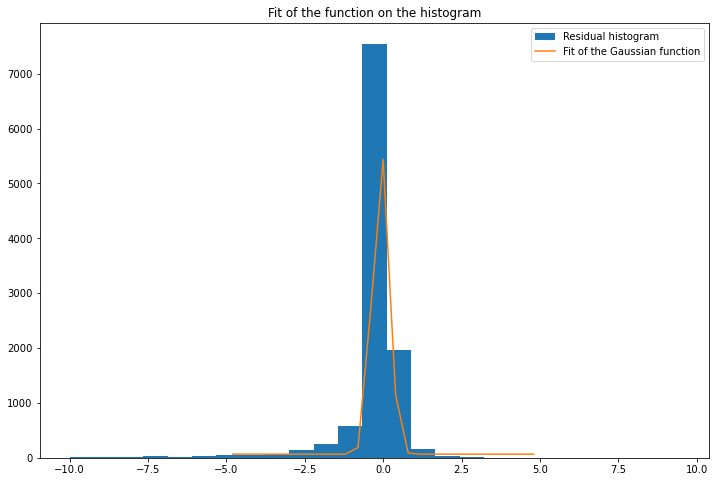

In [30]:
#plotting noiseless to see it clear
from scipy import optimize

df = df[abs(df['residuals']) < 10]

bin_middles = 0.5 * (bins[:-1] + bins[1:])
sigma_i = np.sqrt(np.abs(h))
sigma_i[sigma_i == 0] = 1
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(bin_middles, sigma_i)

#fit it to the histogram of the residuals
def gaussian(x, a, b, x0, sigma):
    return a + b * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
    
popt, pcov = optimize.curve_fit(gaussian, bin_middles, h, full_output=False)
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(df['residuals'], bins=25, label='Residual histogram')
plt.plot(bin_middles, gaussian(bin_middles, *popt), label='Fit of the Gaussian function')
ax.set_title('Fit of the function on the histogram')
ax.legend() 

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

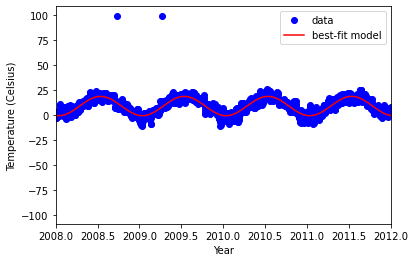

Best-fit values of parameters: a = -9.671276787992156, b = 12.342717348044395, c = 9.0525621024537
Overall average temperature in Munich: 8.94C
Typical daily average values predicted by the model for the coldest and hottest time of year: -0.38C, 18.48C
Fail to reject null hypothesis, additional parameter does not improve the fit


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import f as Fdist


# Load data
data = np.loadtxt("C:/Users/HP/Desktop/python/homework_3/munich_temperatures_average_with_bad_data.txt")
years = data[:,0]
temps = data[:,1]



# Fit function to data
def f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c
popt, pcov = curve_fit(f, years, temps)


# Define function to fit
def g(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t + c) + d
popt_g, pcov_g = curve_fit(g, years, temps)




# Plot data and best-fit model in range 2008 to 2012
plt.plot(years, temps, 'bo', label='data')
plt.plot(years, f(years, *popt), 'r-', label='best-fit model')
plt.xlim(2008, 2012)
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()


# Print best-fit values of parameters
print("Best-fit values of parameters: a = {}, b = {}, c = {}".format(*popt))

# Overall average temperature in Munich
overall_avg = np.mean(temps)
print("Overall average temperature in Munich: {:.2f}C".format(overall_avg))

# Typical daily average values predicted by the model for the coldest and hottest time of year
# These values can be estimated by evaluating the model at t = 0 (January 1st) and t = 0.5 (July 1st)
coldest_temp = f(0, *popt)
hottest_temp = f(0.5, *popt)
print("Typical daily average values predicted by the model for the coldest and hottest time of year: {:.2f}C, {:.2f}C".format(coldest_temp, hottest_temp))

# Meaning of the b parameter and its physical sense
# b is the phase shift of the cosine function, which controls the position of the curve along the x-axis.
# It has a physical sense of controlling the timing of the temperature cycle, for example if b = pi, it means the temperature maximum happens in July and minimum in January.




# Calculate RSS for f(x) and g(x)
RSS_f = np.sum((temps - f(years, *popt))**2)
RSS_g = np.sum((temps - g(years, *popt_g))**2)


p_f = 3
p_g = 4
n = len(years)
F = ((RSS_g-RSS_f)/(p_g-p_f)) / (RSS_f/(n-p_f-1))
p_value = 1 - Fdist.cdf(F, p_g - p_f, n - p_f - 1)


if p_value < 0.05:
    print("Reject null hypothesis, additional parameter improves the fit")
else:
    print("Fail to reject null hypothesis, additional parameter does not improve the fit")

